In [1]:
library('igraph')
library('dplyr')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



<h2>Question 2</h2>

In [2]:
correlation_graph <- read.table('../finance_data/correlation_edgelist.txt')

In [3]:
g <- graph_from_data_frame(correlation_graph, directed=FALSE)

In [4]:
E(g)$weight=as.numeric(correlation_graph[,3])

In [6]:
is.connected(g)
writeLines(paste("Number of edges: ", ecount(g)))
writeLines(paste("Number of vertices: ", vcount(g)))
writeLines(paste("Diameter: ", diameter(g)))
#plot(g, vertex.label=NA, vertex.size=3)

[1] TRUE

Number of edges:  254520
Number of vertices:  505
Diameter:  1.57412856177499


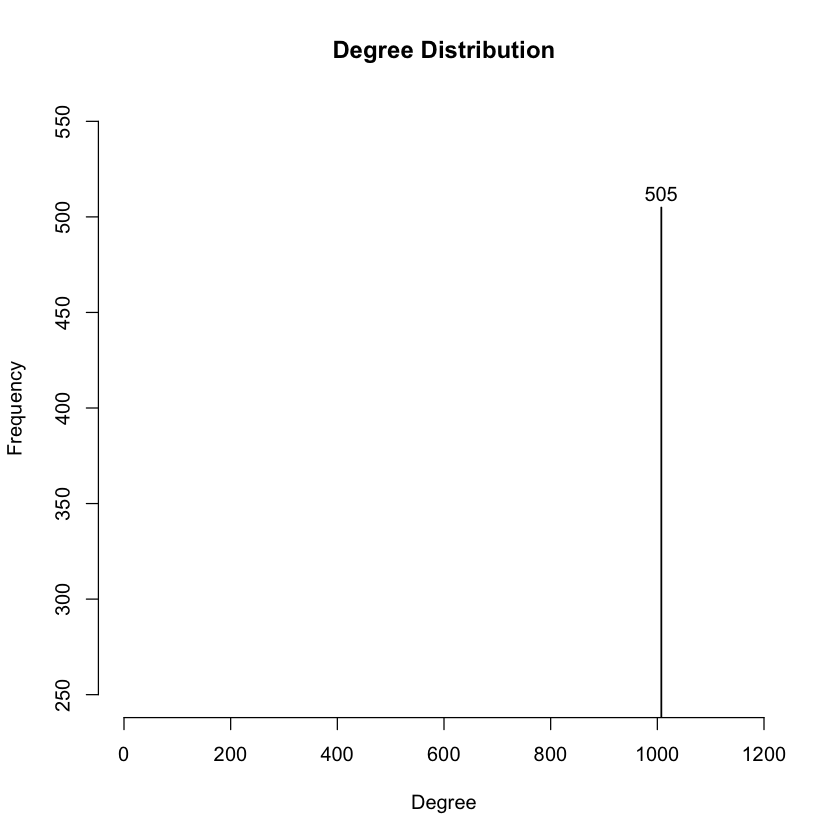

In [7]:
degree_distribution <- degree(g)
histogram <- hist(degree_distribution, breaks=seq(from=1000, to=1010, by=1),
                  xlim=c(0,1200), ylim=c(250,550), 
                  xlab="Degree",ylab="Frequency", main="Degree Distribution")
text(histogram$mids,histogram$counts,labels=histogram$counts, adj=c(0.5, -0.5))

In [8]:
histogram

$breaks
 [1] 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010

$counts
 [1]   0   0   0   0   0   0   0 505   0   0

$density
 [1] 0 0 0 0 0 0 0 1 0 0

$mids
 [1] 1000.5 1001.5 1002.5 1003.5 1004.5 1005.5 1006.5 1007.5 1008.5 1009.5

$xname
[1] "degree_distribution"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

<h3>Unnormalized weights</h3>

In [9]:
unnormalized_correlation_graph <- read.table('../finance_data/unnormalized_correlation_edgelist.txt')

In [10]:
ug <- graph_from_data_frame(unnormalized_correlation_graph, directed=FALSE)

In [11]:
E(ug)$weight=as.numeric(unnormalized_correlation_graph[,3])

In [12]:
is.connected(ug)
writeLines(paste("Number of edges: ", ecount(ug)))
writeLines(paste("Number of vertices: ", vcount(ug)))
writeLines(paste("Diameter: ", diameter(ug)))
#plot(g, vertex.label=NA, vertex.size=3)

[1] TRUE

Number of edges:  254520
Number of vertices:  505
Diameter:  1.57351385062525


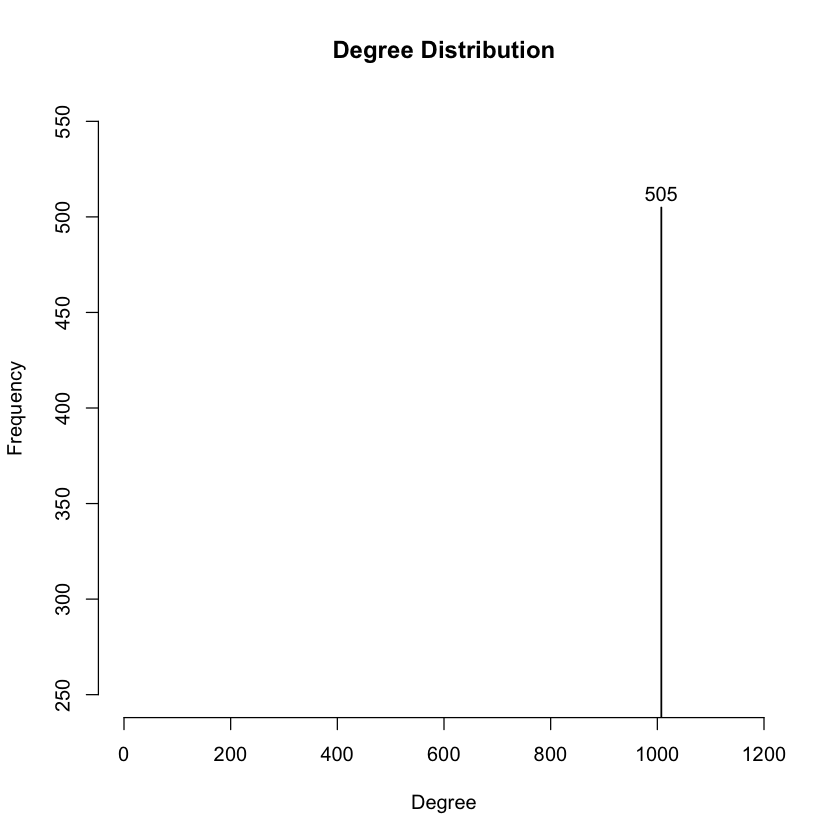

In [13]:
unnormalized_degree_distribution <- degree(ug)
histogram2 <- hist(unnormalized_degree_distribution, breaks=seq(from=1000, to=1010, by=1),
                  xlim=c(0,1200), ylim=c(250,550), 
                  xlab="Degree",ylab="Frequency", main="Degree Distribution")
text(histogram2$mids,histogram2$counts,labels=histogram2$counts, adj=c(0.5, -0.5))

In [14]:
histogram2

$breaks
 [1] 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010

$counts
 [1]   0   0   0   0   0   0   0 505   0   0

$density
 [1] 0 0 0 0 0 0 0 1 0 0

$mids
 [1] 1000.5 1001.5 1002.5 1003.5 1004.5 1005.5 1006.5 1007.5 1008.5 1009.5

$xname
[1] "unnormalized_degree_distribution"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

<h2>Question 3</h2>

In [7]:
g_mst <- mst(g, algorithm="prim")

In [11]:
is.connected(g_mst)
writeLines(paste("Number of edges: ", ecount(g_mst)))
writeLines(paste("Number of vertices: ", vcount(g_mst)))
writeLines(paste("Diameter: ", diameter(g_mst)))
#plot(g, vertex.label=NA, vertex.size=3)

[1] TRUE

Number of edges:  504
Number of vertices:  505
Diameter:  27.3576195646759


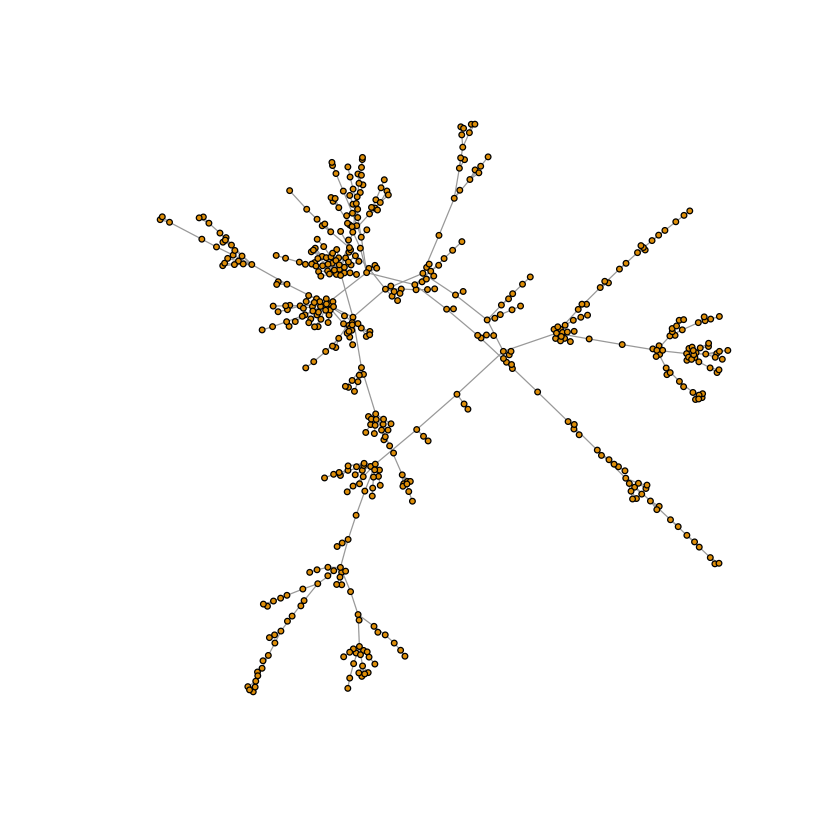

In [14]:
plot(g_mst, vertex.size=2, vertex.label=NA, layout=layout.fruchterman.reingold)

In [13]:
V(g_mst)

+ 505/505 vertices, named, from 88f7092:
  [1] A     AAL   AAP   AAPL  ABBV  ABC   ABT   ACN   ADBE  ADI   ADM   ADP  
 [13] ADS   ADSK  AEE   AEP   AES   AET   AFL   AGN   AIG   AIV   AIZ   AJG  
 [25] AKAM  ALB   ALK   ALL   ALLE  ALXN  AMAT  AMD   AME   AMG   AMGN  AMP  
 [37] AMT   AMZN  AN    ANTM  AON   APA   APC   APD   APH   ARE   ARNC  ATVI 
 [49] AVB   AVGO  AVY   AWK   AXP   AYI   AZO   BA    BAC   BAX   BBBY  BBT  
 [61] BBY   BCR   BDX   BEN   BF.B  BHI   BIIB  BK    BLK   BLL   BMY   BRK.B
 [73] BSX   BWA   BXP   C     CA    CAG   CAH   CAT   CB    CBG   CBOE  CBS  
 [85] CCI   CCL   CELG  CERN  CF    CFG   CHD   CHK   CHRW  CHTR  CI    CINF 
 [97] CL    CLX   CMA   CMCSA CME   CMG   CMI   CMS   CNC   CNP   COF   COG  
[109] COH   COL   COO   COP   COST  COTY  CPB   CRM   CSCO  CSRA  CSX   CTAS 
+ ... omitted several vertices

In [46]:
name_sectors <- read.table('../finance_data/Name_sector.csv', sep=',', header=TRUE)

In [52]:
sectors <- group_by(name_sectors, Sector)

In [58]:
summarize(sectors, count=n())

Sector,count
Consumer Discretionary,85
Consumer Staples,37
Energy,34
Financials,66
Health Care,60
Industrials,65
Information Technology,70
Materials,25
Real Estate,31
Telecommunication Services,4


In [92]:
colors = palette(rainbow(nrow(unique(summarize(sectors)))))
palette = cbind(summarize(sectors), colors)
typeof(palette)

[1] "list"

In [93]:
name_sectors_colors <- left_join(name_sectors, palette, by='Sector')
typeof(name_sectors_colors)

[1] "list"

In [107]:
print(which(name_sectors_colors$Symbol == 'ZTS'))

[1] 505


In [111]:
name_sectors_colors[which(name_sectors_colors$Symbol == 'ZTS'), 3]

[1] #00FF2E
11 Levels: #002EFF #00B9FF #00FF2E #00FFB9 #5D00FF #5DFF00 #E800FF ... red

In [133]:
vertex_colors = rep("darkorange", length(V(g_mst)))
for (v in V(g_mst)$name) {
   vertex_colors[which(V(g_mst)$name == v)] = name_sectors_colors[which(name_sectors_colors$Symbol == v), 3] 
}

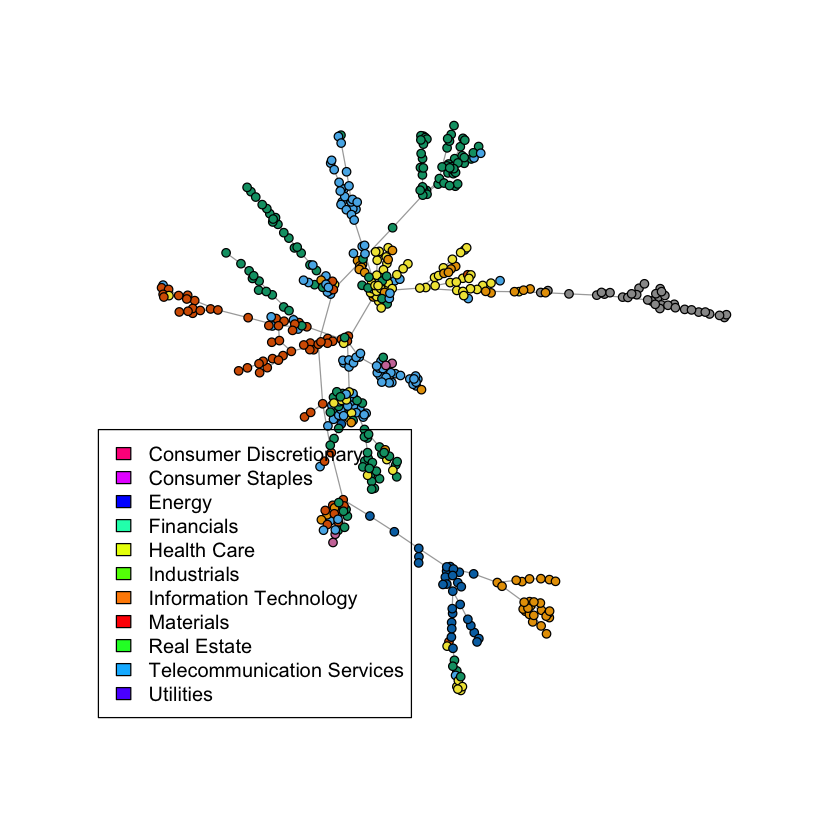

In [202]:
plot(g_mst, vertex.size=3, vertex.label=NA, vertex.color=vertex_colors, layout=layout.fruchterman.reingold)
legend("bottomleft", legend=unlist(palette[1]), fill=unlist(palette[2]))

In [197]:
(palette[1])

Sector
Consumer Discretionary
Consumer Staples
Energy
Financials
Health Care
Industrials
Information Technology
Materials
Real Estate
Telecommunication Services
